In [16]:
import tensorflow as tf 
from tensorflow import keras

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() 

In [10]:
print('x_train_full shape: ', X_train_full.shape, 'x_train_full type: ', X_train_full.dtype) 
print('y_train_full shape: ', y_train_full.shape, 'y_train_full type: ', y_train_full.dtype) 
print('x_test shape: ', X_test.shape, 'x_test type: ', X_test.dtype) 
print('y_test shape: ', y_test.shape, 'y_test type: ', y_test.dtype)

x_train_full shape:  (60000, 28, 28) x_train_full type:  uint8
y_train_full shape:  (60000,) y_train_full type:  uint8
x_test shape:  (10000, 28, 28) x_test type:  uint8
y_test shape:  (10000,) y_test type:  uint8


In [6]:
x_valid, x_train = X_train_full[50000:] / 255.0, X_train_full[:50000] / 255.0
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]

In [17]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28, 28])) 
model.add(keras.layers.Dense(300, activation="relu")) 
model.add(keras.layers.Dense(100, activation="relu")) 
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [21]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 10s 5ms/step - loss: 0.7412 - accuracy: 0.7575 - val_loss: 0.5458 - val_accuracy: 0.8114
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4942 - accuracy: 0.8296 - val_loss: 0.4885 - val_accuracy: 0.8217
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4463 - accuracy: 0.8447 - val_loss: 0.4306 - val_accuracy: 0.8468
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4184 - accuracy: 0.8539 - val_loss: 0.4282 - val_accuracy: 0.8525
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3980 - accuracy: 0.8607 - val_loss: 0.4127 - val_accuracy: 0.8566
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3820 - accuracy: 0.8656 - val_loss: 0.4484 - val_accuracy: 0.8447
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3696 - accuracy: 0.8690 - val_loss: 0.4101 - val_accuracy

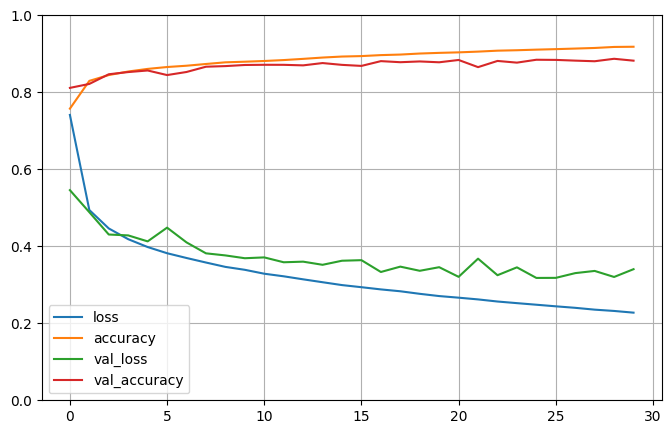

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1] 
plt.show()

In [24]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3623 - accuracy: 0.8735


[0.36231833696365356, 0.8734999895095825]